# Titanic Dataset

Note: I used AI tools to assist with refining the structure, improving grammar, and correcting syntax in this project. The analysis, visualizations, and interpretations are my own work. The AI support was used only to enhance clarity, organization, and language quality.

## Importing Libraries

In [3]:
# Data handling
import os
import zipfile
import glob

import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

## Load The Dataset

In [5]:
df = pd.read_csv("data/train.csv")

# Quick peek
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
# Missing values summary (top to bottom)
df.isna().sum().sort_values(ascending=False)


Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
AgeGroup         0
dtype: int64

## Exploratory Data Anlaysis

In [41]:
# EDA 1: Basic snapshot
print("Rows, Columns:", df.shape)
display(df.head(10))
display(df.tail(5))

Rows, Columns: (891, 13)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult (18+)
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult (18+)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult (18+)
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult (18+)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult (18+)
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Unknown
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult (18+)
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child (<18)
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adult (18+)
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child (<18)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,Adult (18+)
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Adult (18+)
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,Unknown
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Adult (18+)
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,Adult (18+)


In [42]:
# EDA 2: Structure + data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  AgeGroup     891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [33]:
# EDA 3: Missing values table (count + percent)
missing_count = df.isna().sum()
missing_pct = (missing_count / len(df) * 100).round(2)

missing_table = (
    pd.DataFrame({"missing_count": missing_count, "missing_pct": missing_pct})
    .sort_values("missing_count", ascending=False)
)

display(missing_table[missing_table["missing_count"] > 0])

,missing_count,missing_pct
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22


In [34]:
# EDA 4: Duplicate rows
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

# Optional: view duplicates
# display(df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()).head(20))

Duplicate rows: 0


In [35]:
# EDA 5: Summary stats
display(df.describe().T)

# Categorical summary (object columns)
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
if cat_cols:
    display(df[cat_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644
AgeGroup,891,3,Adult (18+),601


In [36]:
# EDA 6: Frequency tables for key categorical variables
for col in ["Survived", "Pclass", "Sex", "Embarked"]:
    if col in df.columns:
        print(f"\nValue counts for {col}:")
        display(df[col].value_counts(dropna=False))


Value counts for Survived:


Survived
0    549
1    342
Name: count, dtype: int64


Value counts for Pclass:


Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Value counts for Sex:


Sex
male      577
female    314
Name: count, dtype: int64


Value counts for Embarked:


Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [37]:
# EDA 7: Survival rate by key categories (tables)
if {"Survived", "Pclass"}.issubset(df.columns):
    display((df.groupby("Pclass")["Survived"].mean() * 100).round(2).to_frame("SurvivalRate(%)"))

if {"Survived", "Sex"}.issubset(df.columns):
    display((df.groupby("Sex")["Survived"].mean() * 100).round(2).to_frame("SurvivalRate(%)"))

if {"Survived", "Embarked"}.issubset(df.columns):
    display((df.groupby("Embarked")["Survived"].mean() * 100).round(2).to_frame("SurvivalRate(%)"))

,SurvivalRate(%)
Pclass,
1,62.96
2,47.28
3,24.24


,SurvivalRate(%)
Sex,
female,74.20
male,18.89


,SurvivalRate(%)
Embarked,
C,55.36
Q,38.96
S,33.70


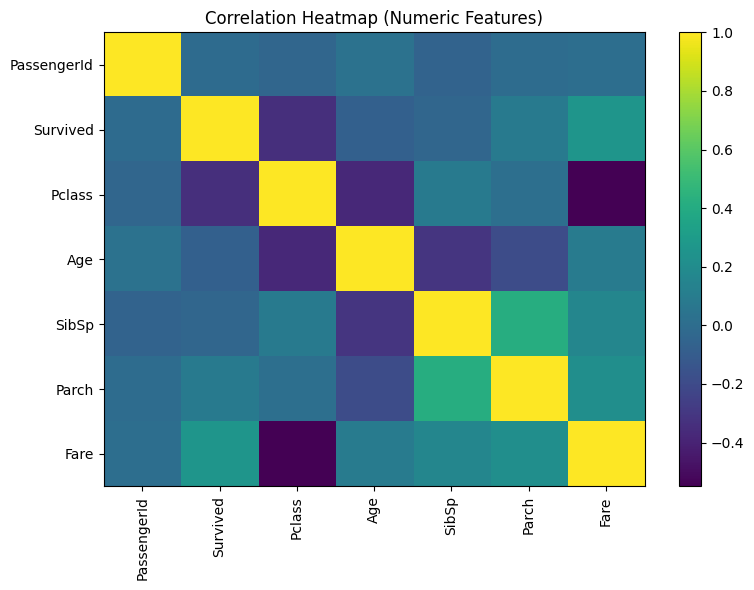

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [38]:
# EDA 8: Correlation among numeric features (matplotlib heatmap)
num_df = df.select_dtypes(include=[np.number])

corr = num_df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
plt.imshow(corr, aspect="auto")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()

display(corr)

In [39]:
# EDA 9: Outlier detection using IQR (Fare, Age)
def iqr_outlier_report(series, name):
    s = series.dropna()
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    outliers = s[(s < low) | (s > high)]
    print(f"\n{name} Outlier Report")
    print("Q1:", q1, "Q3:", q3, "IQR:", iqr)
    print("Lower bound:", low, "Upper bound:", high)
    print("Outlier count:", len(outliers))
    return outliers

if "Fare" in df.columns:
    fare_outliers = iqr_outlier_report(df["Fare"], "Fare")

if "Age" in df.columns:
    age_outliers = iqr_outlier_report(df["Age"], "Age")


Fare Outlier Report
Q1: 7.9104 Q3: 31.0 IQR: 23.0896
Lower bound: -26.724 Upper bound: 65.6344
Outlier count: 116

Age Outlier Report
Q1: 20.125 Q3: 38.0 IQR: 17.875
Lower bound: -6.6875 Upper bound: 64.8125
Outlier count: 11


In [40]:
# EDA 10: Crosstab survival rates by Pclass and Sex
if {"Survived", "Pclass", "Sex"}.issubset(df.columns):
    table = pd.pivot_table(df, values="Survived", index="Pclass", columns="Sex", aggfunc="mean") * 100
    display(table.round(2))

Sex,female,male
Pclass,,
1,96.81,36.89
2,92.11,15.74
3,50.00,13.54


### Clean up for plotting 

In [9]:
# Standardize some text columns (helps avoid tiny typos creating extra categories)
df["Sex"] = df["Sex"].astype(str).str.strip().str.lower()

# Age group (simple and readable split)
df["AgeGroup"] = np.where(df["Age"].isna(), "Unknown",
                   np.where(df["Age"] < 18, "Child (<18)", "Adult (18+)"))

df[["Age", "AgeGroup", "Sex", "Survived", "Pclass"]].head(10)

,Age,AgeGroup,Sex,Survived,Pclass
0,22.0,Adult (18+),male,0,3
1,38.0,Adult (18+),female,1,1
2,26.0,Adult (18+),female,1,3
3,35.0,Adult (18+),female,1,1
4,35.0,Adult (18+),male,0,3
5,NaN,Unknown,male,0,3
6,54.0,Adult (18+),male,0,1
7,2.0,Child (<18),male,0,3
8,27.0,Adult (18+),female,1,3
9,14.0,Child (<18),female,1,2


In [10]:
# Survival rate by class (mean of Survived because 1=survived, 0=did not survive)
rate_by_class = df.groupby("Pclass")["Survived"].mean().sort_index()

rate_by_class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [12]:
import os

ANALYSIS_DIR = "Analysis"   # creates folder in your project
os.makedirs(ANALYSIS_DIR, exist_ok=True)

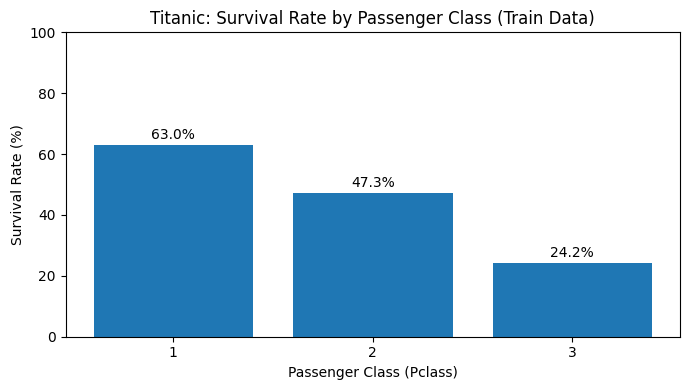

In [43]:
# Plot (ethical: y-axis starts at 0 and uses percent)
plt.figure(figsize=(7, 4))
plt.bar(rate_by_class.index.astype(str), rate_by_class.values * 100)

plt.title("Titanic: Survival Rate by Passenger Class (Train Data)")
plt.xlabel("Passenger Class (Pclass)")
plt.ylabel("Survival Rate (%)")
plt.ylim(0, 100)  # honest scale for a percentage

# Add value labels (simple and clear)
for i, v in enumerate(rate_by_class.values * 100):
    plt.text(i, v + 2, f"{v:.1f}%", ha="center", fontsize=10)

plt.tight_layout()

good_bar_path = os.path.join(ANALYSIS_DIR, "good_survival_rate_by_class_bar.png")
plt.savefig(good_bar_path, dpi=200)
plt.show()



This bar graph shows the survival rate for the three classes of passengers through a percentage scale that ranges from 0% to 100%. From the graph, it is clear that the survival rate for first-class passengers was the highest at about 63%, followed by second-class passengers at 47.3%, and third-class passengers at 24.2%. The fact that the graph starts from zero and that all classes are shown equally means that the differences shown are a true representation of the data. The graph is also clear and easy to understand since the percentages are shown on top of each bar. This is an example of ethical visualization since it does not distort the information.

In [16]:
# Count survived vs not survived
survival_counts = df["Survived"].value_counts().sort_index()
labels = ["Did not survive", "Survived"]
values = [survival_counts.get(0, 0), survival_counts.get(1, 0)]

values

[np.int64(549), np.int64(342)]

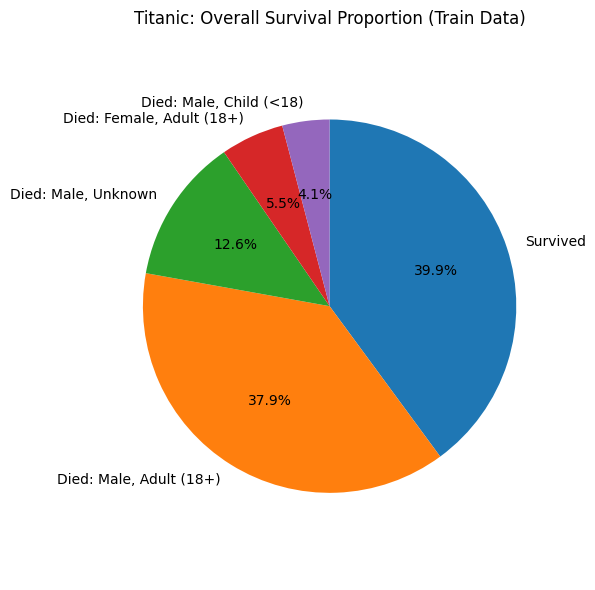

In [44]:
plt.figure(figsize=(6, 6))
plt.pie(
    values,
    labels=labels,
    autopct="%.1f%%",          # show percent clearly
    startangle=90,
    counterclock=False
)
plt.title("Titanic: Overall Survival Proportion (Train Data)")

# Make it a true circle (ethical for pie charts)
plt.axis("equal")

plt.tight_layout()

good_pie_path = os.path.join(ANALYSIS_DIR, "good_overall_survival_pie.png")
plt.savefig(good_pie_path, dpi=200)
plt.show()



This pie chart illustrates the total percentage of the passengers who survived compared to those who did not survive. The pie chart shows that 38.4% of the passengers survived, while 61.6% did not survive. The chart is labeled correctly, and the percentages are marked on the chart, which makes it simple to see the total result of the disaster. The chart does not misrepresent the percentages or conceal the categories, and it gives a clear representation of the total survival rate.

In [18]:
rate_by_sex = df.groupby("Sex")["Survived"].mean().sort_values(ascending=False)
rate_by_sex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

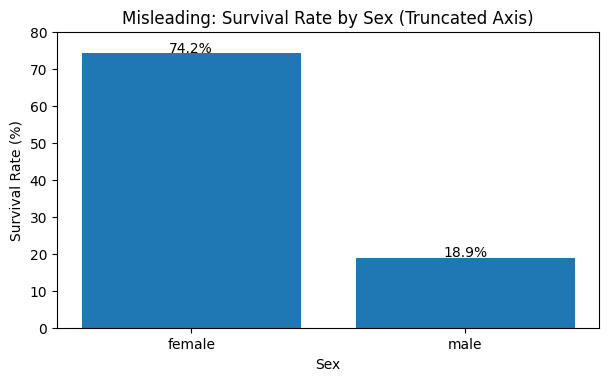

In [49]:
plt.figure(figsize=(7, 4))
plt.bar(rate_by_sex.index, rate_by_sex.values * 100)

plt.title("Misleading: Survival Rate by Sex (Truncated Axis)")
plt.xlabel("Sex")
plt.ylabel("Survival Rate (%)")


plt.ylim(0, 80)

for i, v in enumerate(rate_by_sex.values * 100):
    plt.text(i, v + 0.3, f"{v:.1f}%", ha="center", fontsize=10)

#plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig(bad_bar_path, dpi=200)
plt.show()



Though this graph is employing accurate survival rate information based on gender, the y-axis has been deliberately shortened, beginning at 60% rather than 0%. Such a manipulation of the axis scale tends to emphasize the disparity between the survival rates of both genders. In this case, the survival rate for females is made to seem much greater compared to the actual disparity when a proportional perspective is taken. Even if the information presented is accurate, the axis manipulation can tend to deceive the audience into thinking that the disparity is greater.

In [28]:
# Build misleading pie slices:
#  - 1 slice for Survived
#  - Multiple slices for Did not survive (Male / Female / Child / Unknown)
did_not_survive = df[df["Survived"] == 0].copy()
survived = df[df["Survived"] == 1].copy()

death_by_group = did_not_survive.groupby(["Sex", "AgeGroup"]).size().sort_values(ascending=False)

# Create up to 4 death slices for a total of 5 slices (including Survived)
top_death_slices = death_by_group.head(4)

labels = ["Survived"] + [f"Died: {idx[0].title()}, {idx[1]}" for idx in top_death_slices.index]
values = [len(survived)] + top_death_slices.values.tolist()

labels, values

(['Survived',
  'Died: Male, Adult (18+)',
  'Died: Male, Unknown',
  'Died: Female, Adult (18+)',
  'Died: Male, Child (<18)'],
 [342, 325, 108, 47, 35])

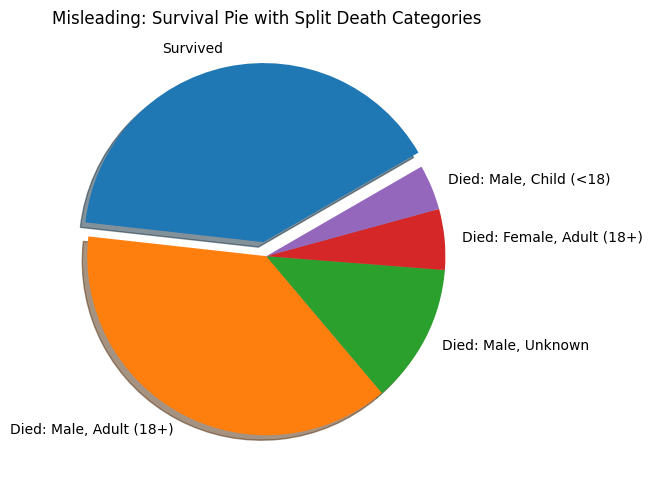

In [47]:
plt.figure(figsize=(7, 5))

# 5 slices  5 colors automatically (matplotlib's default cycle)
# We add 'shadow' and 'explode' to add visual drama (another misleading emphasis technique).
explode = [0.08] + [0.0] * (len(values) - 1)  # emphasize "Survived" slice

plt.pie(
    values,
    labels=labels,
    startangle=30,
    shadow=True,
    explode=explode,
    autopct=None               # hide percentages (less transparency)
)

plt.title("Misleading: Survival Pie with Split Death Categories")


# Without axis('equal'), the pie can appear slightly stretched depending on figure layout.
plt.tight_layout()

bad_pie_path = os.path.join(ANALYSIS_DIR, "bad_split_deaths_pie_5colors.png")
plt.savefig(bad_pie_path, dpi=200)
plt.show()



 This pie chart breaks down the “Died” category into several smaller subcategories (such as male adult, female adult, male child), but lumps the “Survived” category back together into a single large category. This uneven breakdown causes the survival category to look much larger and more prominent than it actually is when compared side by side. This pie chart shows how breaking down one category into several smaller ones can affect how the data is viewed. Even though the data is still correct, it is still misleading.